In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
data=pd.read_csv('data.csv')

In [17]:
X = data.drop('target', axis=1)
y = data['target']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
regressors = [LinearRegression(), DecisionTreeRegressor()]
for reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(f"Regressor: {reg.__class__.__name__}")
    print("R-squared:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print()

Regressor: LinearRegression
R-squared: 0.9165749856447738
Mean Squared Error: 0.05830481558826366

Regressor: DecisionTreeRegressor
R-squared: 0.8569157392686804
Mean Squared Error: 0.1



In [18]:
cm = confusion_matrix(y_test, y_pred)

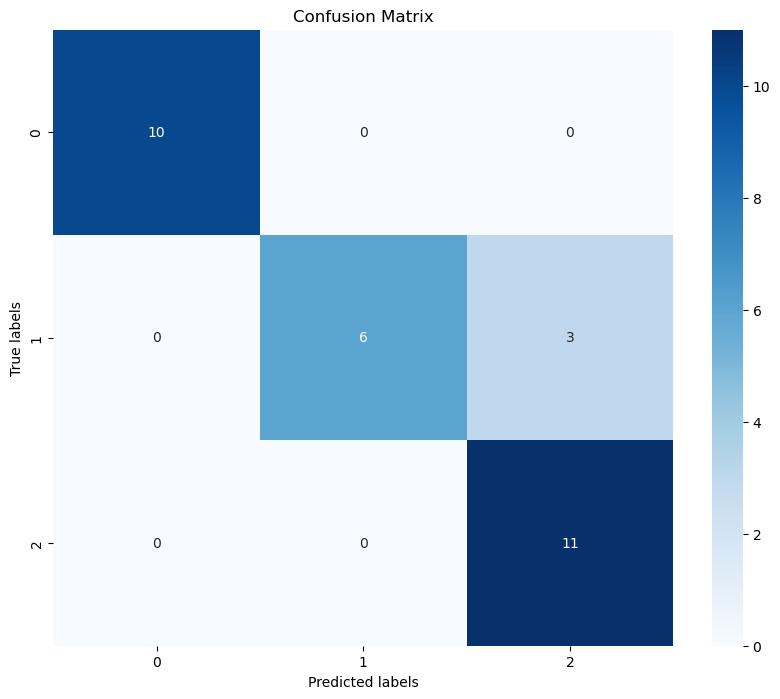

In [19]:


# # Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# # Compute the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')



In [21]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9
Precision: 0.9214285714285714
Recall: 0.9
F1 Score: 0.896
